<a href="https://colab.research.google.com/github/rocx320/MachineLearning/blob/main/2247226_ML_LAB_3_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#For PCA
from sklearn.decomposition import PCA

#Lungs Cancer Dataset

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
data=pd.read_csv("lungs.csv")
type(data)
print(data)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [ ]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
data.shape

(309, 16)

###Preprocessing

In [ ]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

###Checking of null values

In [ ]:
data.isnull().values.any()

False

In [ ]:
data=data.drop(columns=["GENDER"],axis=1)

###Visualization of dataset

In [ ]:
data.corr()

<ipython-input-40-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


###Finding unique class values for categorizing and encoding categorical data

In [ ]:
category=data['LUNG_CANCER'].unique()
print("The number of unique classes in level prediction:",data['LUNG_CANCER'].nunique())
print("The unique values for level: ",category)

The number of unique classes in level prediction: 2
The unique values for level:  ['YES' 'NO']


###Extracting the independent variables(Features) and the dependent variables(Label)

In [ ]:
X = data.drop(columns=['LUNG_CANCER'],axis=1)
y = data['LUNG_CANCER']
print("Features: ")
print(X)
print("Target: ")
print(y)

Features: 
     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0     69        1               2        2              1                1   
1     74        2               1        1              1                2   
2     59        1               1        1              2                1   
3     63        2               2        2              1                1   
4     63        1               2        1              1                1   
..   ...      ...             ...      ...            ...              ...   
304   56        1               1        1              2                2   
305   70        2               1        1              1                1   
306   58        2               1        1              1                1   
307   67        2               1        2              1                1   
308   62        1               1        1              2                1   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING

###Feature Scaling

In [ ]:
sc = StandardScaler()
scaled_data = pd.DataFrame(sc.fit_transform(X))
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475
1,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475
2,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475
3,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475
4,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-0.814095,-1.135292,-1.150351,-0.996769,0.996769,0.990338,0.696833,-1.120480,-1.120480,0.892475,0.852207,0.748736,1.063501,-1.120480
305,0.893846,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,0.696833,0.892475,0.892475,0.892475,0.852207,0.748736,-0.940291,0.892475
306,-0.570103,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,-1.435063,0.892475,0.892475,0.892475,0.852207,-1.335584,-0.940291,0.892475
307,0.527859,0.880830,-1.150351,1.003241,-1.003241,-1.009756,0.696833,0.892475,-1.120480,0.892475,0.852207,0.748736,-0.940291,0.892475


###Visualization the dataset before performing PCA

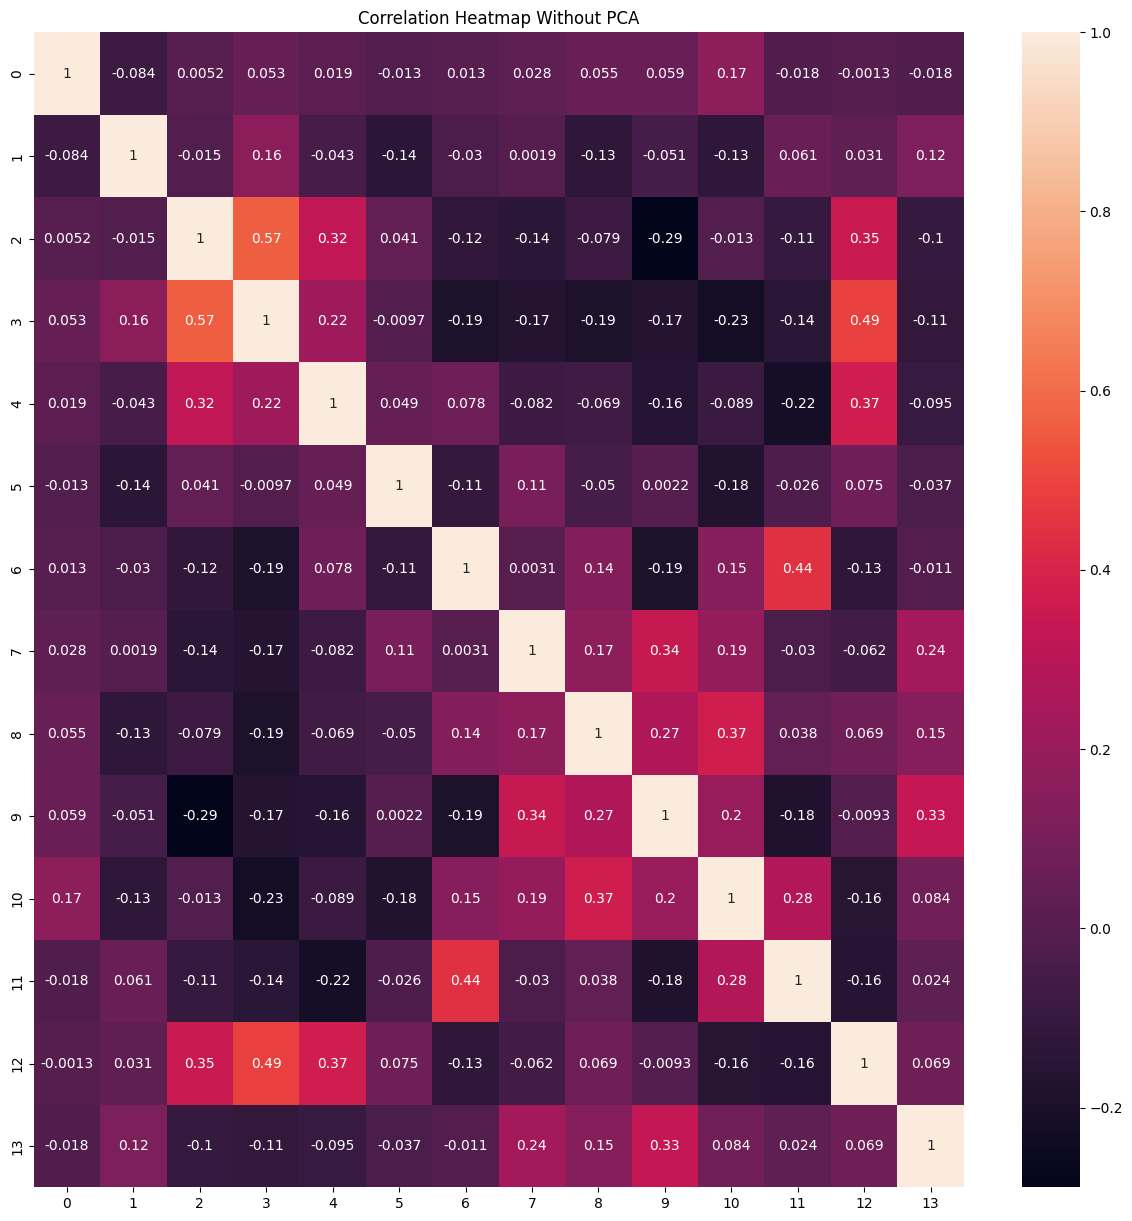

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(scaled_data.corr(), annot=True)
plt.title('Correlation Heatmap Without PCA')

# Display the plot
plt.show()

###Applying PCA to reduce the number of columns from dataset to reduce dimensionality

In [ ]:
pca = PCA()
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
explained_variances = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratios
cumulative_variances = np.cumsum(explained_variances)

# Determine the number of principal components needed for maximum variance
num_components_for_max_variance = np.argmax(cumulative_variances >= 0.95) + 1

# Print the percentage of variance explained by each principal component
for i, variance in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {variance*100:.2f}% variance explained")

# Print the number of principal components needed for maximum variance
print(f"\nNumber of Principal Components for 95% Variance: {num_components_for_max_variance}")

Principal Component 1: 19.06% variance explained
Principal Component 2: 12.88% variance explained
Principal Component 3: 10.96% variance explained
Principal Component 4: 9.10% variance explained
Principal Component 5: 7.82% variance explained
Principal Component 6: 6.88% variance explained
Principal Component 7: 6.36% variance explained
Principal Component 8: 5.58% variance explained
Principal Component 9: 5.05% variance explained
Principal Component 10: 4.43% variance explained
Principal Component 11: 4.09% variance explained
Principal Component 12: 3.35% variance explained
Principal Component 13: 2.37% variance explained
Principal Component 14: 2.07% variance explained

Number of Principal Components for 95% Variance: 12


###So by taking just 12 principal components we can reduce the dimensionality of the dataset and remove correlations between all principal components.

In [ ]:
pca = PCA(n_components = 12)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

###Co-variance Matrix Display

In [ ]:
cov_matrix = np.cov(data_pca, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 2.67723350e+00  2.42230478e-16  1.96091339e-16  8.07434927e-17
   3.54694629e-16  4.03717464e-16 -2.62055889e-16 -3.17206578e-16
   4.44810134e-16 -3.28741363e-16  4.03717464e-16  3.66229413e-16]
 [ 2.42230478e-16  1.80876170e+00  2.88369617e-18 -2.30695693e-16
   3.63345717e-16 -2.16277213e-16  7.61295788e-16  6.48831638e-17
  -6.05576195e-17  2.19160909e-16 -3.05671794e-16 -3.74880502e-17]
 [ 1.96091339e-16  2.88369617e-18  1.53925041e+00 -5.65204449e-16
   9.22782774e-17 -2.84044073e-16 -8.07434927e-17  4.03717464e-17
   1.38417416e-16  1.58603289e-17 -5.19065310e-17 -4.18135944e-16]
 [ 8.07434927e-17 -2.30695693e-16 -5.65204449e-16  1.27794473e+00
  -1.19096652e-15  7.49761004e-17  4.54182146e-16 -4.72926172e-16
  -1.93928567e-16  1.23998935e-16  1.49952201e-16 -6.63250119e-17]
 [ 3.54694629e-16  3.63345717e-16  9.22782774e-17 -1.19096652e-15
   1.09769465e+00  1.76482205e-15  3.11439186e-16 -1.96091339e-16
  -6.92087080e-17 -9.80456697e-17  1.87440251e-16  2.

###Displaying Eigen Values and Eigen Vector

In [ ]:
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.6772335  1.8087617  1.53925041 1.27794473 1.09769465 0.96619156
 0.89336177 0.7843353  0.70896764 0.62208505 0.57514123 0.47115243]
Eigenvectors:
[[ 3.53959266e-02 -6.81021208e-02 -4.07174236e-01 -4.56680264e-01
  -3.09087816e-01 -6.89813921e-02  1.71052920e-01  2.45326951e-01
   2.52219485e-01  2.73498512e-01  3.06848560e-01  2.08548594e-01
  -3.45835417e-01  1.85355301e-01]
 [ 7.58265697e-02 -3.98564774e-02  4.03074515e-02  1.07192178e-01
   6.87570392e-02  1.19913263e-01 -4.02753863e-01  3.43715523e-01
   2.16726010e-01  5.08027691e-01  2.49328004e-02 -4.28620605e-01
   2.86131283e-01  3.29876500e-01]
 [-2.48858533e-01  1.62469246e-01 -3.33645240e-01 -1.62147699e-01
  -2.88080285e-01  1.47411572e-01 -3.47542222e-01 -4.49244423e-02
  -4.16699738e-01  4.70118732e-02 -4.77548598e-01 -2.45914170e-01
  -2.84346962e-01 -3.61870632e-02]
 [ 2.11493910e-01 -6.87329717e-01 -2.21905822e-02 -2.14655257e-01
   1.32310400e-01  4.04078695e-01 -8.10379648e-02 -4.35875129e-02
   5.08

###Displaying the transformed data

In [ ]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.201040,0.336369,-2.136652,-0.489055,-1.000545,-0.123424,0.948426,1.811916,0.872062,-0.893098,0.049142,0.618770
1,0.497098,-0.571206,0.953160,-0.620315,1.171126,-1.971466,-1.639304,0.975344,-0.179338,-0.440574,-0.464527,-1.568065
2,1.417837,-1.510398,-0.935935,0.343391,0.078582,1.739304,-0.340133,0.690117,1.031399,0.856630,-0.152323,-0.642174
3,-1.890788,1.465758,1.432687,-1.562414,-1.498429,0.076866,0.345675,1.015115,0.680882,-0.272298,-0.037121,0.321577
4,0.493160,-1.334901,-0.341291,1.158982,-1.843188,0.459130,1.995637,0.024687,0.257547,0.687192,-0.466265,-1.012695
...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.243653,-0.802614,-0.113518,1.469218,1.120612,0.766168,-0.177975,0.617907,0.114564,-0.040666,2.808261,0.069325
305,2.990585,0.088008,-0.361969,-1.196370,-0.682906,-0.368707,-0.656301,0.021202,-0.332235,-0.047114,-0.267226,0.026945
306,2.139418,1.729013,1.255836,-0.884212,-1.163156,0.946433,0.441942,-0.703953,-0.308631,0.688497,-0.455526,-0.512296
307,1.556559,-0.161618,0.243611,-1.805404,-0.820317,-1.172912,-0.606987,-0.491389,0.608751,-0.987633,0.629684,0.644233


###Visualize the dataset

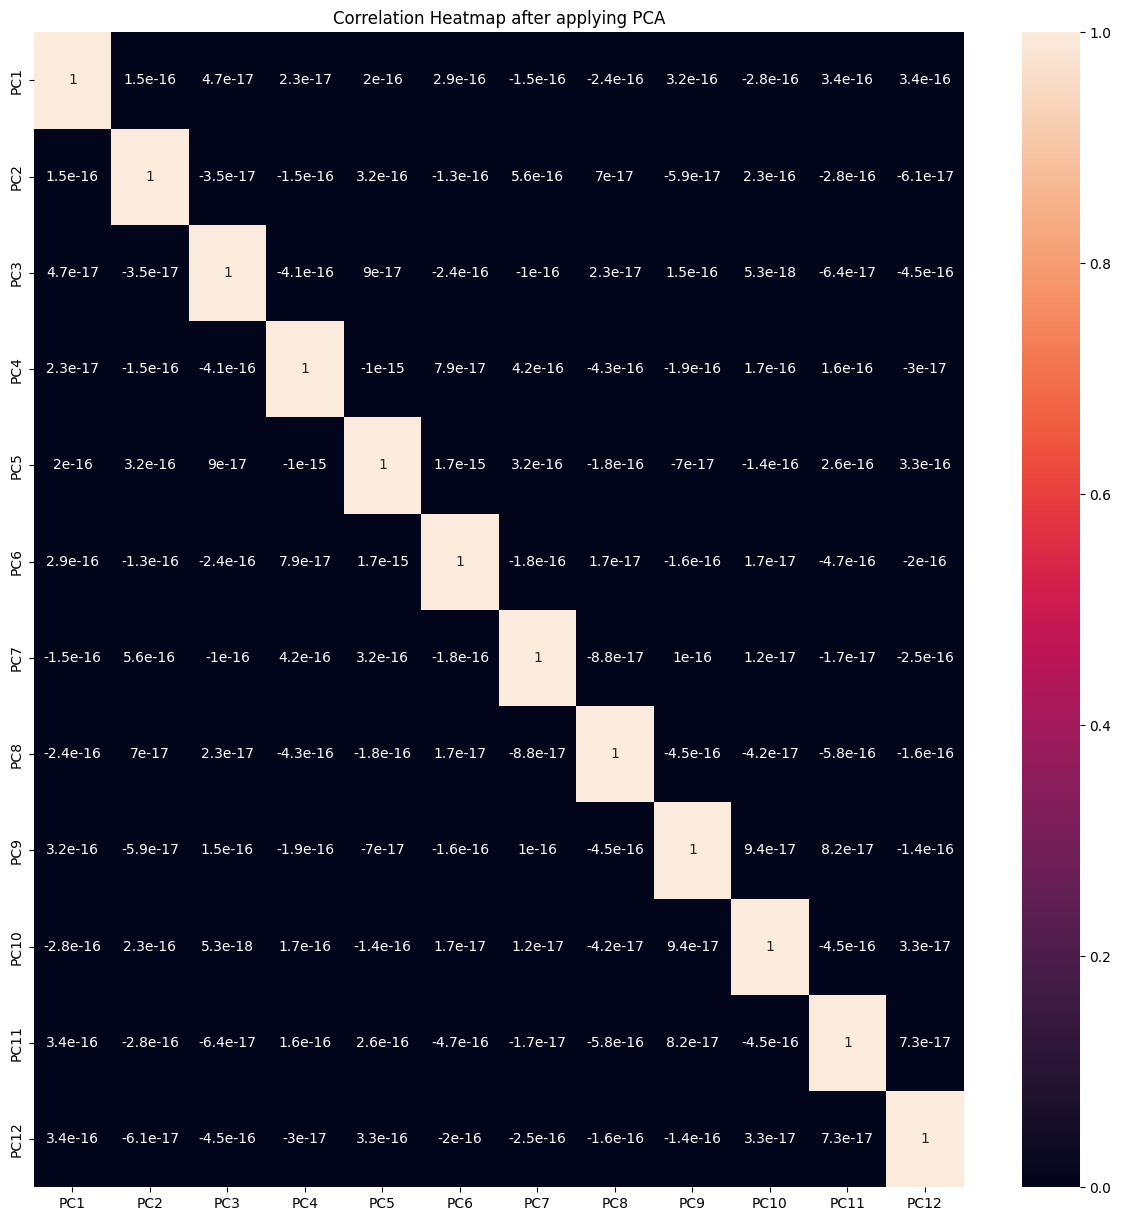

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_pca.corr(),annot=True)
plt.title('Correlation Heatmap after applying PCA')

# Display the plot
plt.show()